<a href="https://colab.research.google.com/github/Naveenklaxman22/Techno-Trench-DS/blob/main/Customer_Segmentation_Analysis-DS-Task-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
Customer Segmentation Analysis:
Objective: Segment customers into distinct groups based on
behavior and demographics.
Details: Apply clustering techniques like K-means
'''

'\nCustomer Segmentation Analysis:\nObjective: Segment customers into distinct groups based on\nbehavior and demographics.\nDetails: Apply clustering techniques like K-means \n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Univariate Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

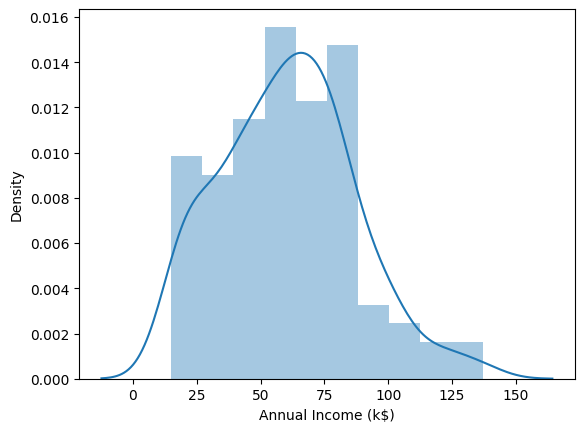

In [7]:
sns.distplot(df['Annual Income (k$)'])

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

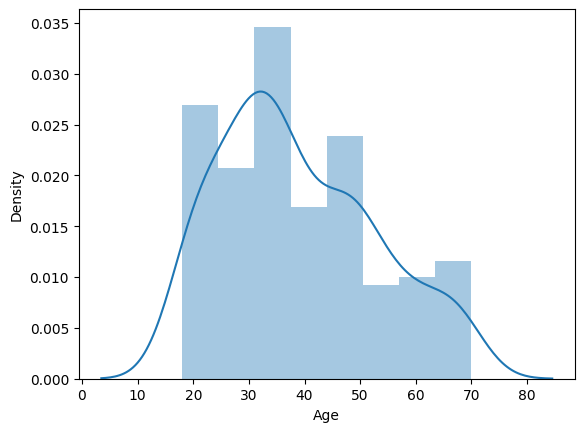

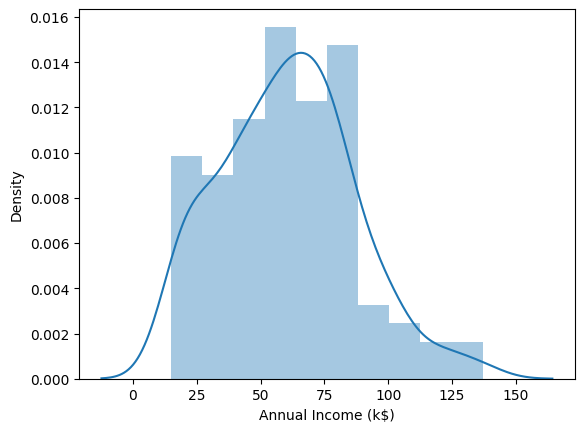

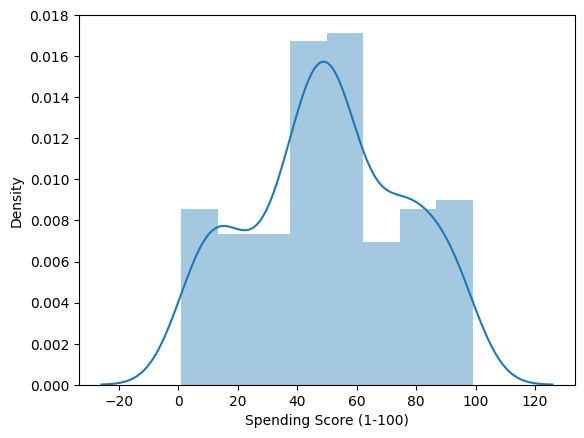

In [9]:
columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

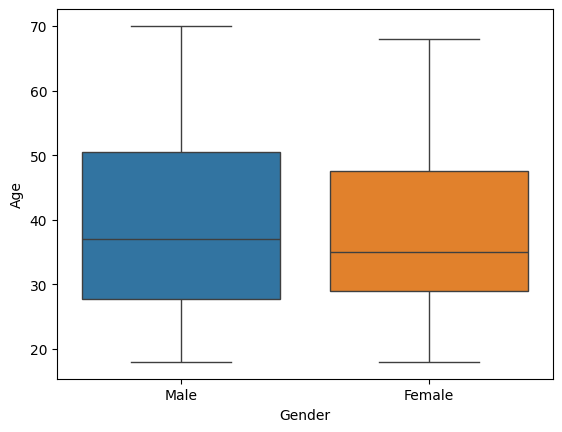

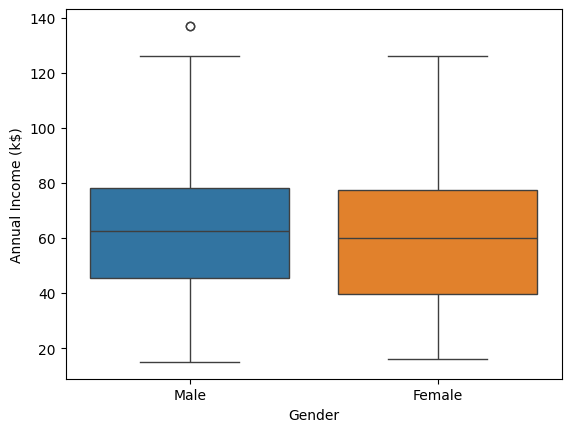

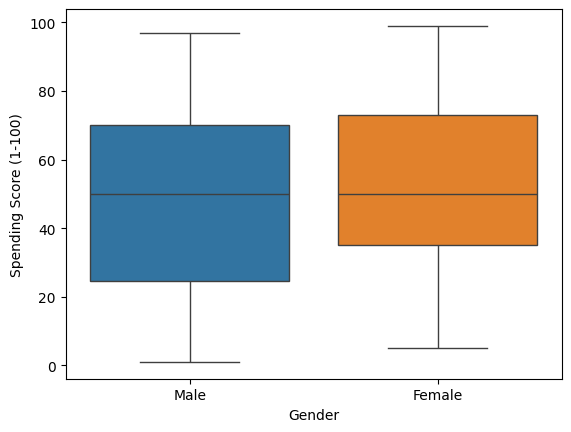

In [10]:
columns_=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns_ :
        plt.figure()
        sns.boxplot(data=df, x='Gender',y=df[i], hue='Gender');

In [11]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

**BIVARIATE** **ANALYSIS**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

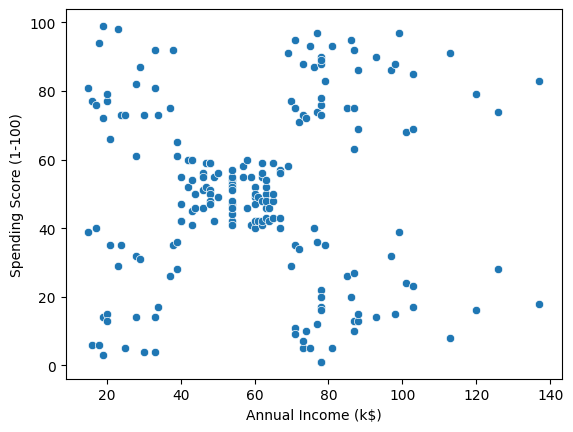

In [12]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

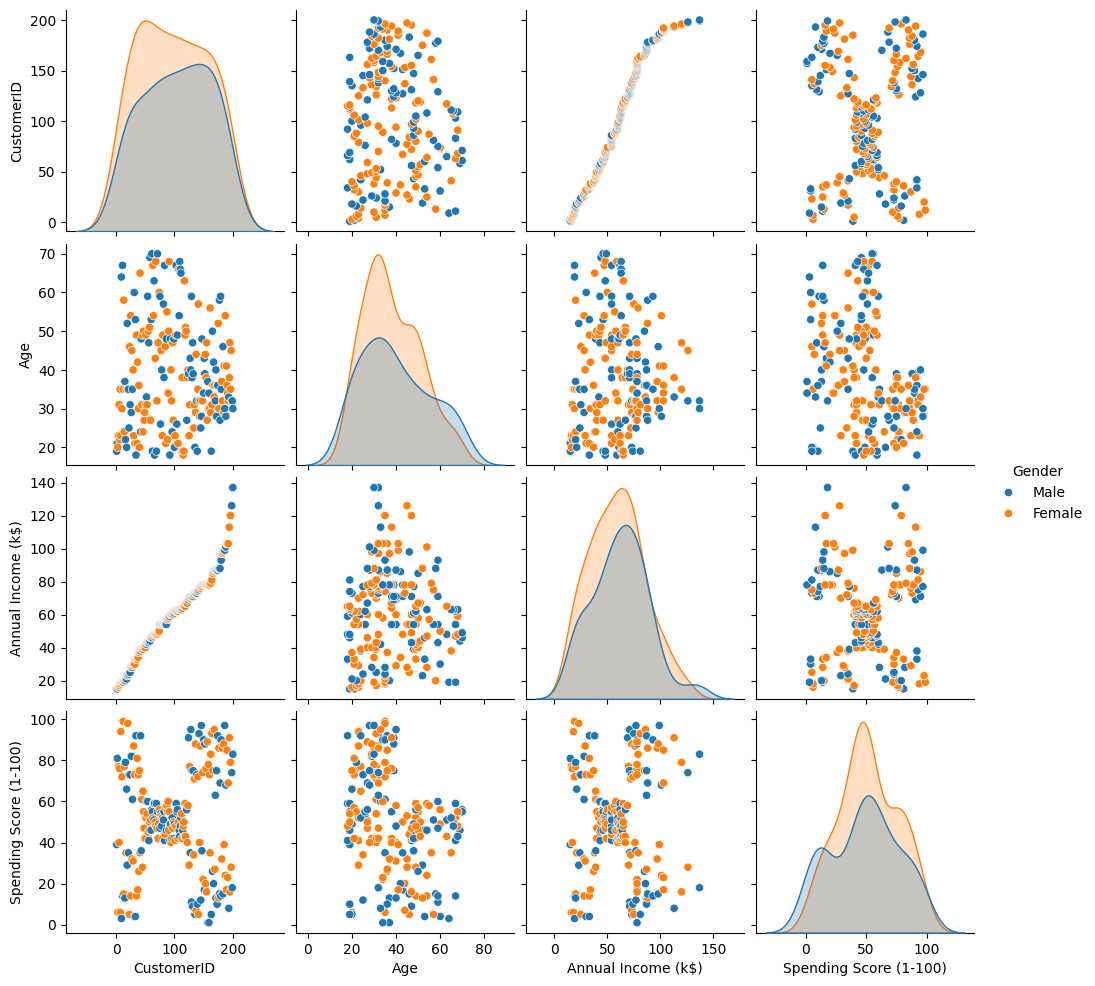

In [13]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df, hue='Gender')

In [14]:
df.groupby (['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
dtf=pd.get_dummies(df,drop_first=True)

In [16]:
dtf.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.057400,0.060867,0.056410,-0.058109,1.000000


<Axes: >

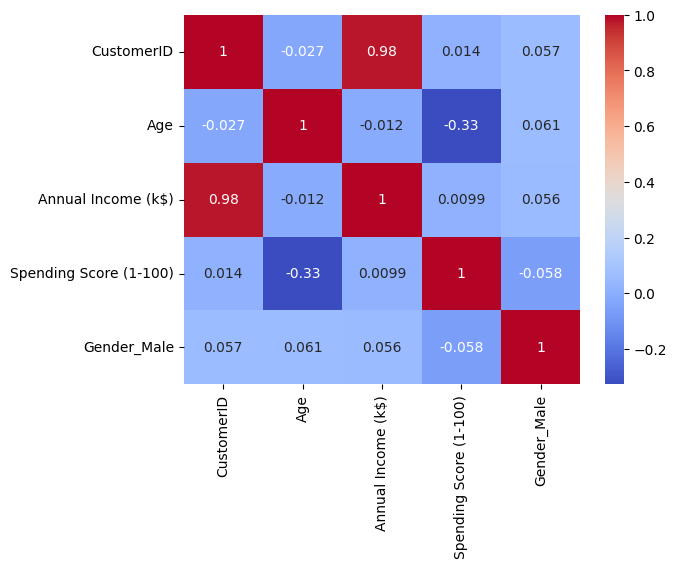

In [17]:
sns.heatmap(dtf.corr(),annot=True, cmap='coolwarm')

# **Clustering** - **Univariate, Bivariate, Multivariate**

In [25]:
clustering1 = KMeans(n_clusters=3)

In [26]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [27]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [28]:
df['Income Cluster'] = clustering1.labels_

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [30]:
df['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [31]:
clustering1.inertia_

23517.33093093093

In [35]:
inertia_scores=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [36]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2857.441697191697,
 2232.5832112332114,
 1746.4707792207803]

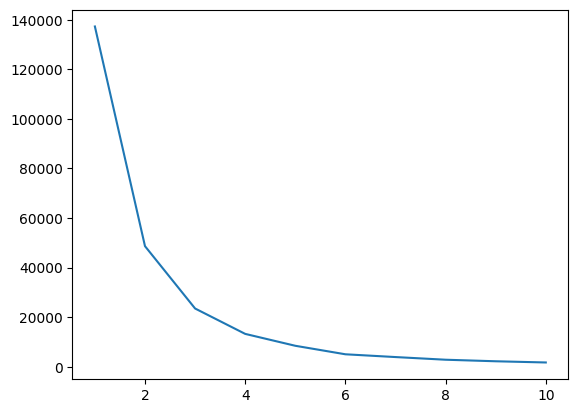

In [38]:
plt.plot(range(1,11),inertia_scores);

In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [41]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


In [42]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


In [43]:
inertia_scores2=[]
for i in range (1,11):
  kmeans2=KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)

In [44]:
inertia_scores2

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25029.25342493587,
 21794.8856090982,
 19634.554629349976]

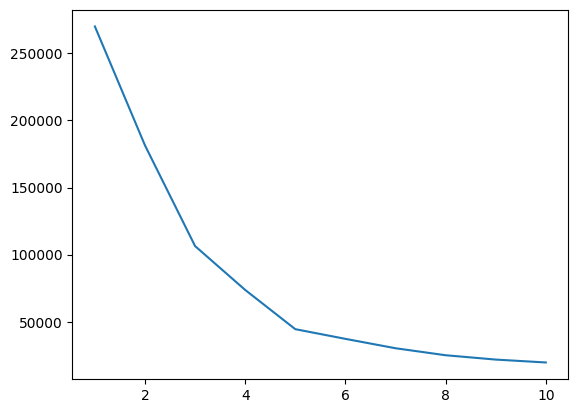

In [45]:
plt.plot(range(1,11),inertia_scores2);

In [49]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,88.200000,17.114286
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,26.304348,20.913043


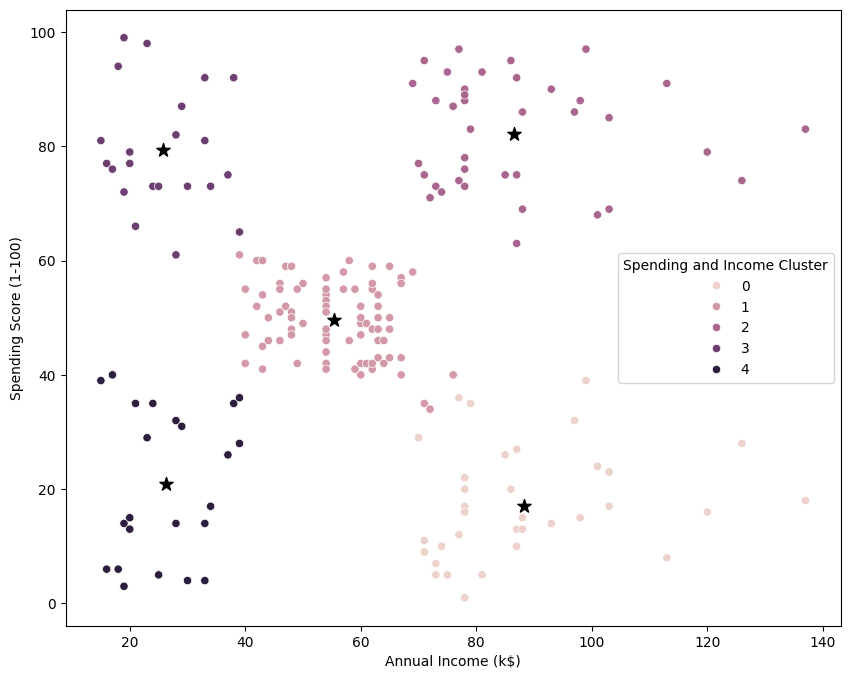

In [65]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster');
plt.savefig('clustering_bivariate.png')

In [53]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [ ]:
df.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

**mulivariate clustering**

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scale = StandardScaler()

In [56]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,3,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,3,False
4,5,31,17,40,1,4,False


In [ ]:
dff.columns

In [57]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [58]:
dff = scale.fit_transform(dff)

In [59]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


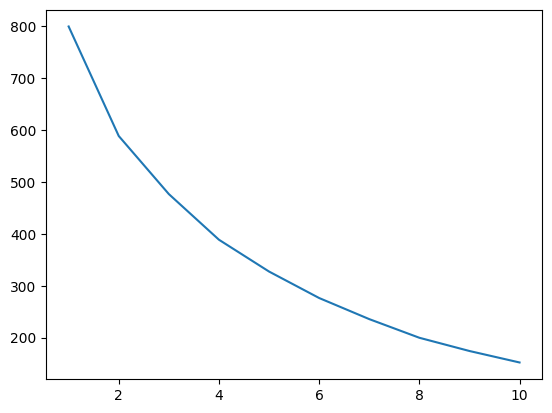

In [60]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [61]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,2
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,0,2
198,199,Male,32,137,18,0,0


In [62]:
df.to_csv('Clustering.csv')